In [12]:
import openmc
import openmc.lib
import numpy as np
from matplotlib import pyplot as plt


# OpenMC Sourcce Definitions
In this exercise, you will explore OpenMC source definitions. There are four sub-exercises, each involving a source definition of increasing complexity. Please begin from the geometry provided below:

**Use the provided `sample_source` and `plot_sites` functions to check your work**

## I. Explicit Source Definition

1. Plot the geometry (always a good idea).
1. Add a 4 MeV isotropic neutron source at the center of the large sphere.
1. Use the provided `sample_source` function to retrieve and view information about the source sites' energy, position, and angle.
1. Plot the source sites on top of the geometry.

## II. Two Sources

Note: As you move through this section of the exercise, create a new source object for each source.

Starting with the same geometry as Part I, do the following:

1. Place a 4 MeV source at the center of each sphere. Make the sources of equal intensity. Sample and plot 1000 source sites with `sample_source` and print the engery, position, and angle of the first 10.
1. Change the source definition so that the source in the large sphere has three times the intensity of the source in the small sphere. Sample and plot 1000 source sites with `sample_source` and print the engery, position, and angle of the first 10.
1. Change the source definition to be a 4 MeV uniform line source (along the x axis) through center of the large sphere. Sample and plot 1000 source sites with `sample_source` and print the engery, position, and angle of the first 10.
1. Change the source definition to have uniform line sources through the centers of both spheres (along the x axis).
   Sample and plot 1000 source sites with `sample_source` and print the engery, position, and angle of the first 10.
1. Adjust the relative probabilities of the line sources to reflect their length (i.e., there is a greater probability of the source particle being in the larger sphere). This will lead to uniform sampling along the two sources.
   Sample and plot 1000 source sites with `sample_source` and print the engery, position, and angle of the first 10. 
1. Using the same spatial distribution as in Part II.4, change the energy distribution to include all of the following:
    - No source particles have energies below 1 MeV.
    - The source energy as linearly increasing to 2 MeV.
    - The source energy as linearly decreasing to 5 MeV.
  Sample and plot 1000 source sites with `sample_source` and print the engery, position, and angle of the first 10.

## III. Independent Source Distribution

1. Plot the geometry (always a good idea).
1. Add two equal-strength planar sources with the following distributions:
      - x distribution
        - Source 1: x = 5.01
        - Source 2: x = -7.99
      - y distribution: Uniform between y=[-25, 25]
      - z distribution: linearly varying from 0 at z=-25 to the highest value at z=25
    - energy distribution:
        - 1/4 with E=2 MeV
        - 1/4 with E=12 MeV
        - 1/2 with E distributed uniformly between 5 and 10 MeV
      angle distribution:
        - isotropic

# IV. Dependent Source Distribution & Source Direction

1. Plot the geometry (always a good idea).
1. Define a set of isotropic point sources in the spheres that are centered on the circle of radius 5 cm.
1. Modify these sources to be mono-directional and aimed at the center of the geometry.

Please submit your notebook as <last_name>_exercise10.ipynb

In [2]:
from tempfile import TemporaryDirectory
def sample_source(model, n_samples=1000, seed=1):
    """ Initializes the OpenMC problem and samples source sites

    Parameters
    ----------
    model : openmc.Model
        The model object used for the source. Assumed to be a fixed source problem.

    n_samples: Integral
        The number of source sites to sample. Default is 1000.

    seed: Integral
        The random number seed used in OpenMC. Default is 1.
    """
    with TemporaryDirectory() as d:
        model.export_to_model_xml()
        try:
            openmc.lib.init()
            openmc.lib.settings.seed = seed
            openmc.lib.simulation_init()
            sites = openmc.lib.sample_external_source(1000)
        finally:
            openmc.lib.finalize()

    return sites

In [3]:
from matplotlib import pyplot as plt

def plot_sites(ax, sites, basis='xy', arrows=False):
    """Add sites to the matplotlib axes

    Parameters
    ----------
    ax : matplotlib.axes object
        Generally, the axes returned from `openmc.Universe.plot`

    sites : Iterable of openmc.SourceParticle
        The source sites to plot

    basis : One of ('xy, 'yz', 'xz')
        The basis of the plot. Default is 'xy'.

    arrows : bool
        Whether or not to plot the sites as arrows or dots.
    """

    basis_indices = {'xy': [0, 1],
                     'yz': [1, 2],
                     'xz': [0, 2]}

    indices = basis_indices[basis]

    for site in sites:
        x, y = np.asarray(site.r)[indices]
        u, v = np.asarray(site.u)[indices]
        if arrows:
            ax.arrow(x, y, u, v, head_width=0.1)
        else:
            ax.plot(x, y,  marker='o', markerfacecolor='blue')


In [4]:
# Part I and II Geometry

# materials
water = openmc.Material()
water.set_density('g/cm3', 1.0)
water.add_nuclide('H1', 2.0, 'ao')
water.add_nuclide('O16', 1.0, 'ao')

# surfaces
pos_sphere = openmc.Sphere(x0=25, r=10)
neg_sphere = openmc.Sphere(x0=-25, r=30)
rect_prism = openmc.model.RectangularParallelepiped(xmin=-100,
                                                    xmax=100,
                                                    ymin=-100,
                                                    ymax=100,
                                                    zmin=-100,
                                                    zmax=100,
                                                    boundary_type='vacuum')

# cells
pos_cell = openmc.Cell(region=-pos_sphere, fill=water)
neg_cell = openmc.Cell(region=-neg_sphere, fill=water)
outer_region = +neg_sphere & +pos_sphere & - rect_prism
outer_cell = openmc.Cell(region=outer_region)

# geometry object
geometry = openmc.Geometry([pos_cell, neg_cell, outer_cell])

In [5]:
source = openmc.IndependentSource()

# define source distributions here


model = openmc.Model()



In [7]:
model.geometry = geometry
model.settings = openmc.Settings()

In [9]:
model.settings.particles = 100
model.settings.batches = 5
model.settings.run_mode = 'fixed source'

model.settings.source = source

# OR

# model.settings.source = [source1, source2, etc.]

In [13]:
sites = sample_source(model, n_samples=100)

<class 'matplotlib.axes._axes.Axes'>


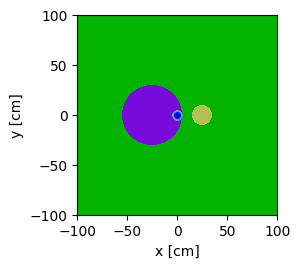

In [26]:
ax = geometry.plot()
print(type(ax))
plot_sites(ax, sites)
plt.show()

In [20]:
# Part III Geometry

# materials
iron = openmc.Material()
iron.set_density('g/cm3', 7.874)
iron.add_element('Fe', 1.0)

water = openmc.Material()
water.set_density('g/cm3', 1.0)
water.add_nuclide('H1', 2.0, 'ao')
water.add_nuclide('O16', 1.0, 'ao')

# surfaces
rect0 = openmc.model.RectangularParallelepiped(5, 25, -25, 25, -25, 25)
rect1 = openmc.model.RectangularParallelepiped(-30, -8, -25, 25, -25, 25)
rcc0 = openmc.model.RightCircularCylinder(center_base=(-8, 0, 0),
                                          height=13,
                                          radius=20,
                                          axis='x')
rect2 = openmc.model.RectangularParallelepiped(-45, 45, -30, 30, -30, 30, boundary_type='vacuum')

# cells
iron_cell1 = openmc.Cell(region=-rect0, fill=iron)
iron_cell2 = openmc.Cell(region=-rect1, fill=iron)
water_cell = openmc.Cell(region=-rcc0, fill=water)
void_cell = openmc.Cell(region=+rect0 & +rect1 & +rcc0 & -rect2)

# create geometry
geometry = openmc.Geometry([iron_cell1, iron_cell2, water_cell, void_cell])

In [24]:
# Part IV Starting Geometry

# surfaces
radius = 0.2
centers = [(5, 0, 0),
           (4.33, 2.5, 0),
           (2.5, 4.33, 0),
           (0, 5, 0),
           (3.536, -3.536, 0),
           (0, 0, 0)]

spheres = [openmc.Sphere(r=radius, x0=x, y0=y, z0=z) for x, y, z in centers]
outer_sphere = openmc.Sphere(r=25, boundary_type='vacuum')

# cells
cells = [openmc.Cell(region=-sphere, fill=water) for sphere in spheres]
outer_region = -outer_sphere
for sphere in spheres:
    outer_region &= +sphere
outer_cell = openmc.Cell(region=outer_region)

# create geometry object
geometry = openmc.Geometry([*cells, outer_cell])